In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np

import torch_nf
from torch_nf.conditional_nf import NormFlow, ConditionedNormFlow
from torch_nf.error_formatters import dbg_check
from torch_nf.systems import MF_V1
from torch_nf.util import plot_dist
from torch_nf.lfi import train_SNPE, train_APT

import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
system = MF_V1()

z0 = np.array([[1.3, -1.3, 1.3, -1.0, 0.2, 0.2, 0.2, 0.2]])

x0 = system.simulate(z0)
print(z0)
print(x0)

[[ 1.3 -1.3  1.3 -1.   0.2  0.2  0.2  0.2]]
[[0.69489994 0.92288649 1.07991848 0.80281852 1.13049231 1.40219812
  0.2737869  0.32562157 0.42706351 0.2737869  0.32562157 0.42706351]]


In [3]:
from torch_nf.bijectors import ToInterval
# Opt params
D = system.D
M = 2000
M_atom = 100
num_iters = 2000
R = 4

# two-network arch
arch_type = 'autoregressive'
hidden_layers = [64, 64]

rs = 1
np.random.seed(rs)
torch.manual_seed(rs)

#lb = -float('inf')*np.ones((D,)) #system.lb
#ub = float('inf')*np.ones((D,)) #system.ub
lb = system.lb
ub = system.ub
support_layer = ToInterval(D, lb, ub)

nf = NormFlow(D, arch_type, True, num_stages=1, 
              num_layers=2, num_units=25, support_layer=support_layer)
cnf = ConditionedNormFlow(nf, x0.shape[1], hidden_layers, dropout=False)
print(cnf.param_net)

Sequential(
  (linear1): Linear(in_features=12, out_features=64, bias=True)
  (tanh1): Tanh()
  (linear2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): Tanh()
  (linear3): Linear(in_features=64, out_features=2066, bias=True)
)


### Run SNPE

<Figure size 432x288 with 0 Axes>

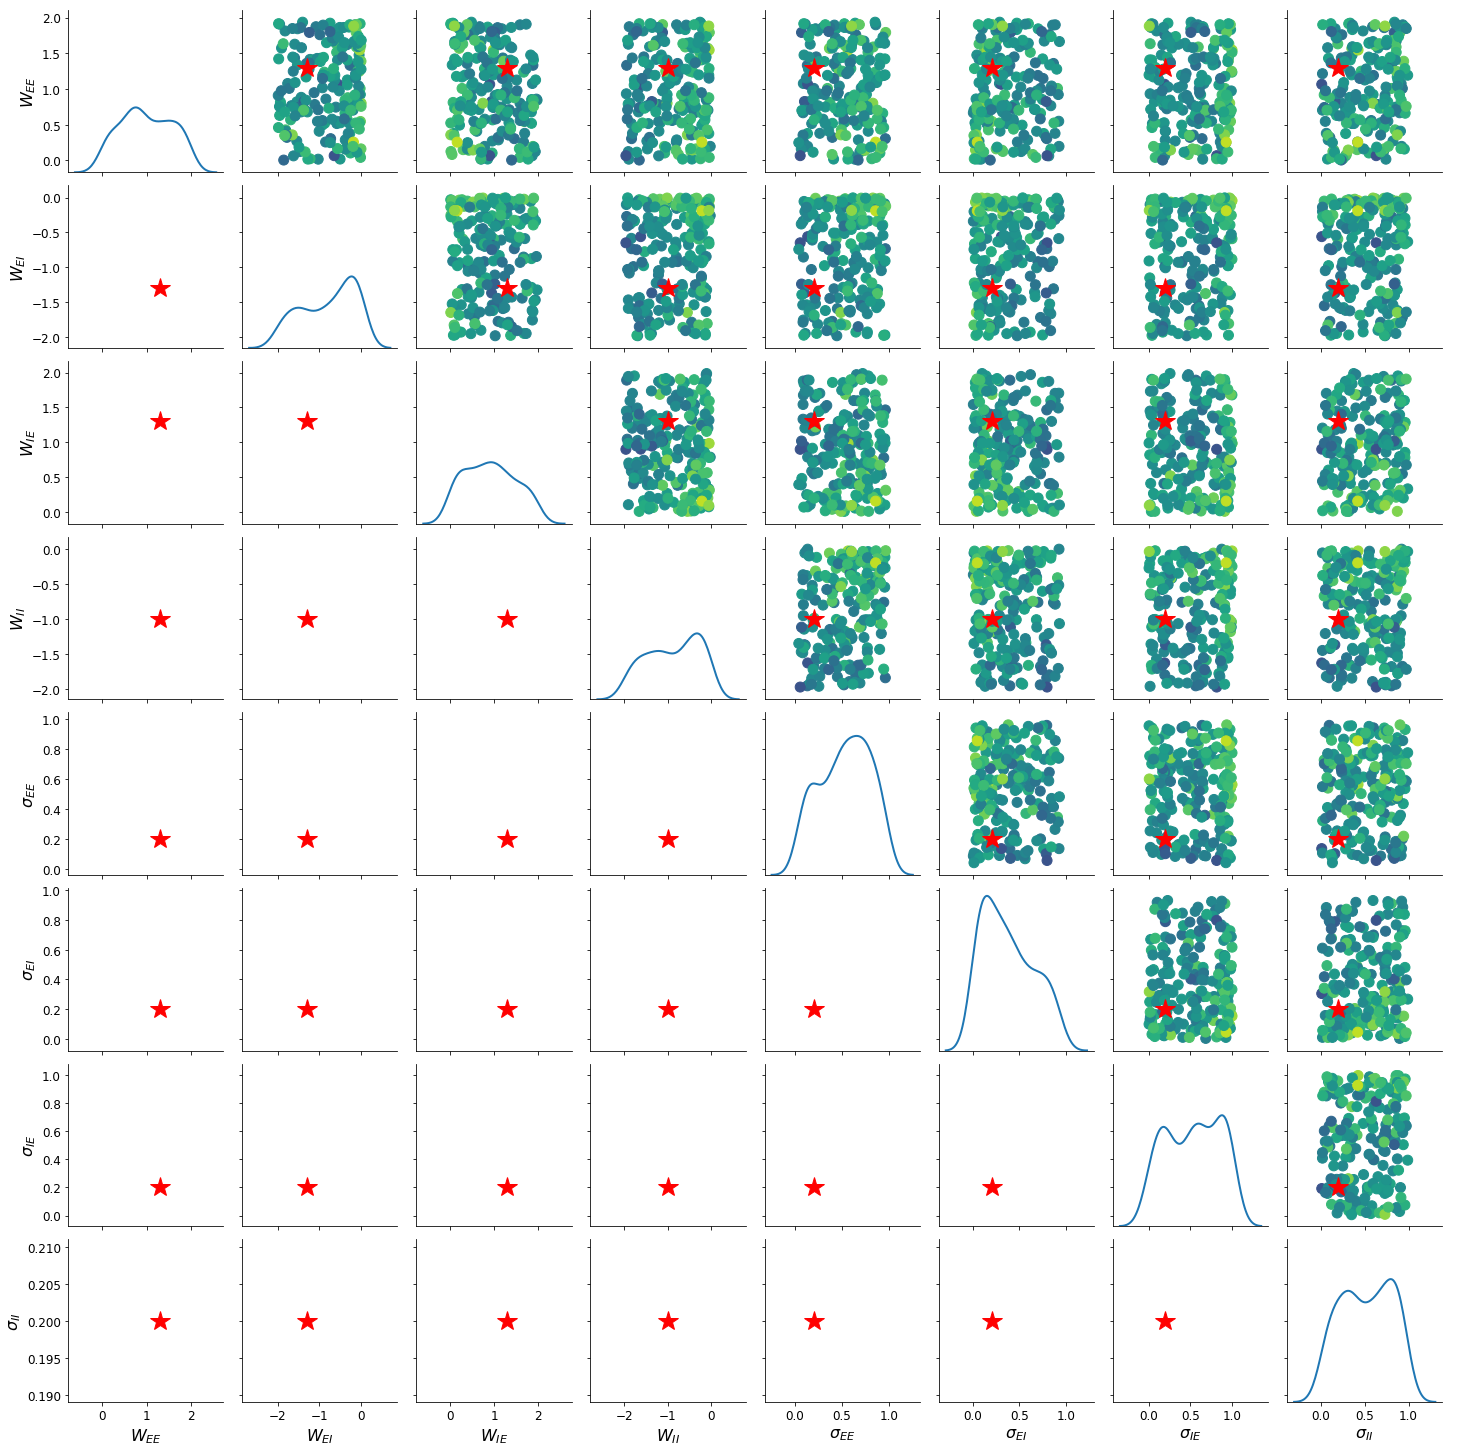

r 1, it 1, loss=7.48E+00, time/it=0.061
r 1, it 100, loss=3.69E+00, time/it=0.046
r 1, it 200, loss=3.50E+00, time/it=0.048
r 1, it 300, loss=3.62E+00, time/it=0.046
r 1, it 400, loss=3.11E+00, time/it=0.065
r 1, it 500, loss=3.20E+00, time/it=0.078
r 1, it 600, loss=2.98E+00, time/it=0.051
r 1, it 700, loss=3.00E+00, time/it=0.059
r 1, it 800, loss=3.06E+00, time/it=0.048
r 1, it 900, loss=2.88E+00, time/it=0.049
r 1, it 1000, loss=2.98E+00, time/it=0.048
r 1, it 1100, loss=3.21E+00, time/it=0.048
r 1, it 1200, loss=3.12E+00, time/it=0.051
r 1, it 1300, loss=3.04E+00, time/it=0.054
r 1, it 1400, loss=2.92E+00, time/it=0.047
r 1, it 1500, loss=3.01E+00, time/it=0.063
r 1, it 1600, loss=3.09E+00, time/it=0.047
r 1, it 1700, loss=3.05E+00, time/it=0.046
r 1, it 1800, loss=2.90E+00, time/it=0.048
r 1, it 1900, loss=2.88E+00, time/it=0.062
r 1, it 2000, loss=2.79E+00, time/it=0.050


<Figure size 432x288 with 0 Axes>

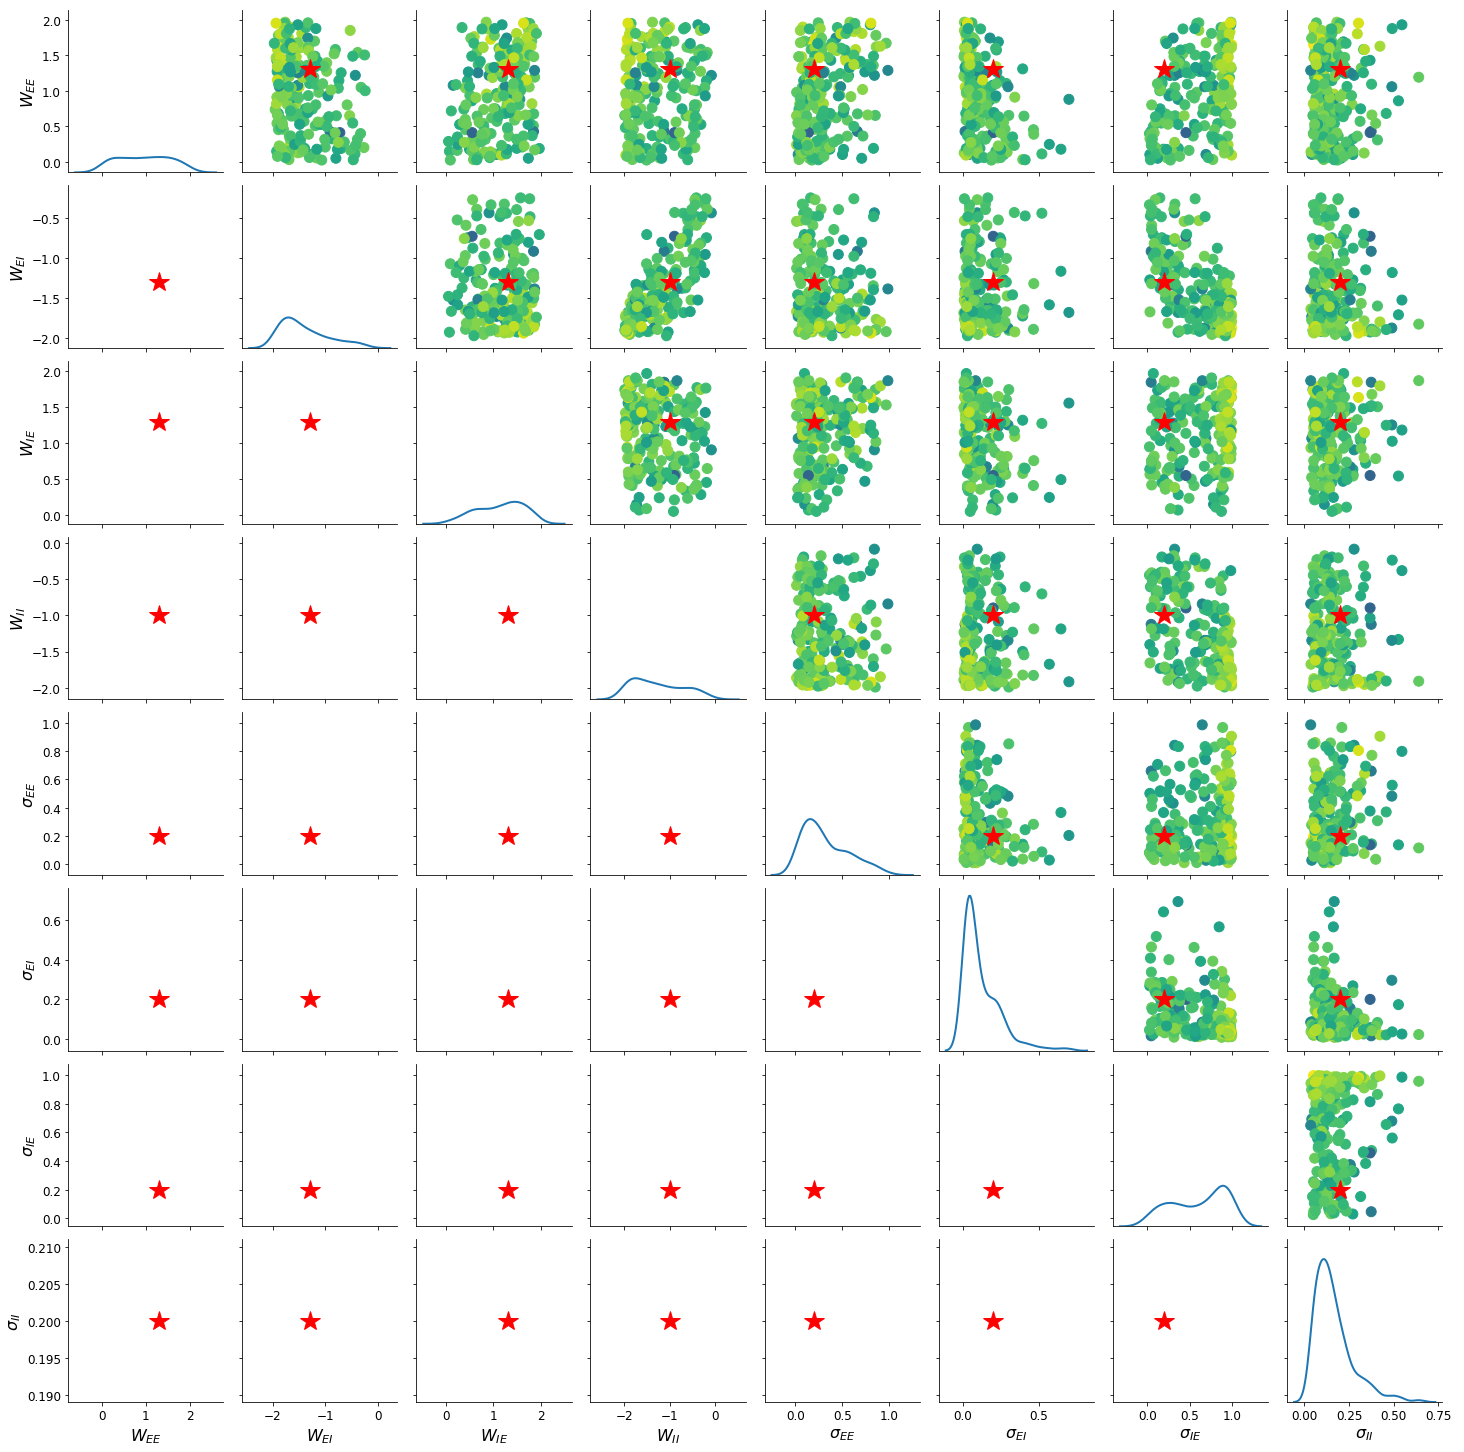

r 2, it 100, loss=3.12E+00, time/it=0.062
r 2, it 200, loss=3.06E+00, time/it=0.050
r 2, it 300, loss=2.79E+00, time/it=0.051
r 2, it 400, loss=2.77E+00, time/it=0.051
r 2, it 500, loss=2.43E+00, time/it=0.048
r 2, it 600, loss=2.89E+00, time/it=0.055
r 2, it 700, loss=2.64E+00, time/it=0.051
r 2, it 800, loss=2.50E+00, time/it=0.050
r 2, it 900, loss=2.22E+00, time/it=0.049
r 2, it 1000, loss=2.68E+00, time/it=0.048
r 2, it 1100, loss=2.34E+00, time/it=0.048
r 2, it 1200, loss=2.22E+00, time/it=0.049
r 2, it 1300, loss=2.20E+00, time/it=0.075
r 2, it 1400, loss=2.33E+00, time/it=0.049
r 2, it 1500, loss=1.94E+00, time/it=0.049
r 2, it 1600, loss=2.07E+00, time/it=0.056
r 2, it 1700, loss=2.15E+00, time/it=0.049
r 2, it 1800, loss=2.18E+00, time/it=0.048
r 2, it 1900, loss=2.01E+00, time/it=0.050
r 2, it 2000, loss=2.20E+00, time/it=0.051


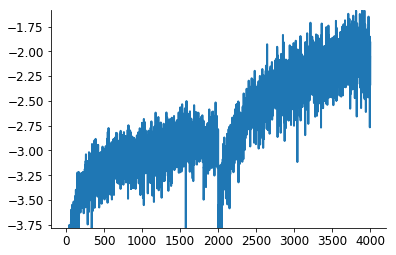

<Figure size 432x288 with 0 Axes>

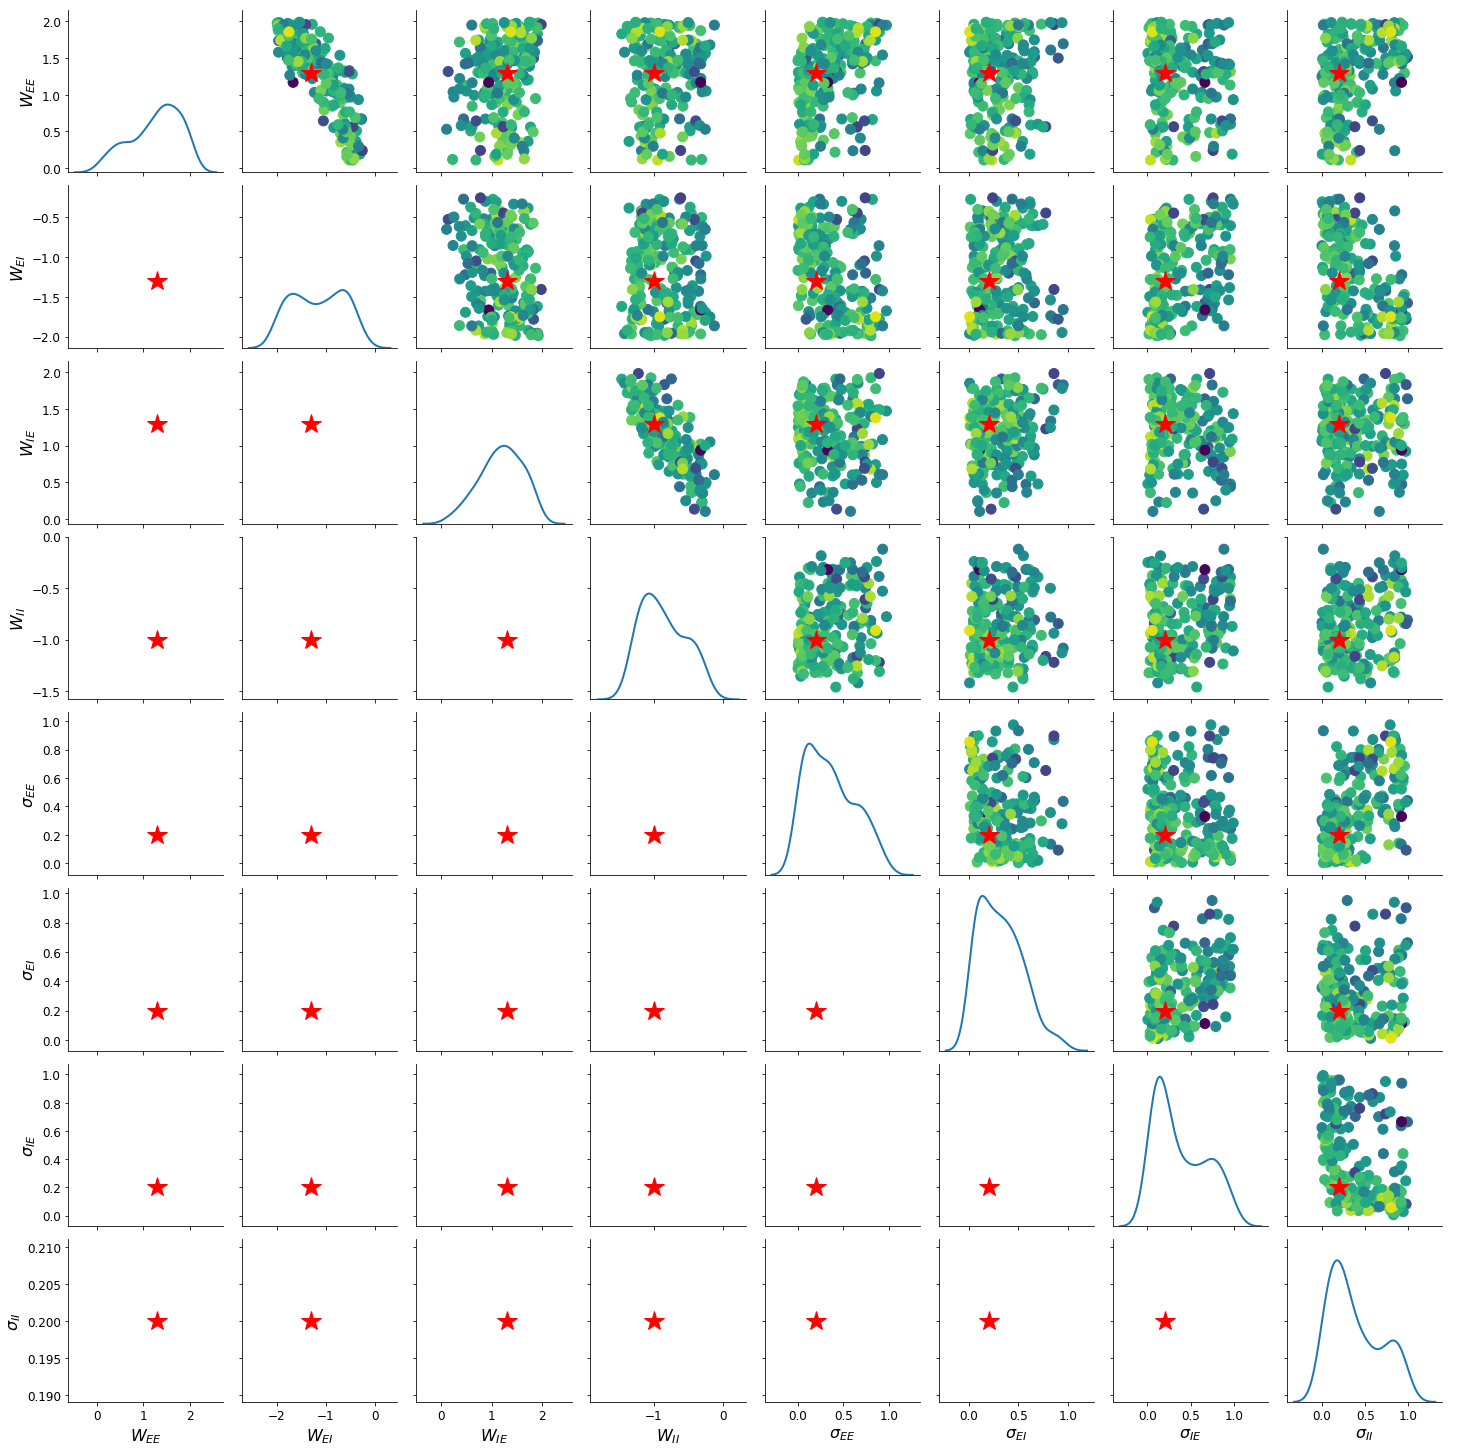

r 3, it 100, loss=2.73E+00, time/it=0.051
r 3, it 200, loss=2.48E+00, time/it=0.060
r 3, it 300, loss=3.01E+00, time/it=0.050
r 3, it 400, loss=2.93E+00, time/it=0.052
r 3, it 500, loss=2.58E+00, time/it=0.048
r 3, it 600, loss=2.41E+00, time/it=0.048
r 3, it 700, loss=2.35E+00, time/it=0.048
r 3, it 800, loss=2.46E+00, time/it=0.050
r 3, it 900, loss=2.72E+00, time/it=0.047
r 3, it 1000, loss=2.52E+00, time/it=0.048
r 3, it 1100, loss=2.38E+00, time/it=0.048
r 3, it 1200, loss=2.40E+00, time/it=0.050
r 3, it 1300, loss=2.39E+00, time/it=0.048
r 3, it 1400, loss=2.46E+00, time/it=0.044
r 3, it 1500, loss=2.29E+00, time/it=0.045
r 3, it 1600, loss=2.81E+00, time/it=0.044
r 3, it 1700, loss=2.48E+00, time/it=0.042
r 3, it 1800, loss=2.54E+00, time/it=0.045
r 3, it 1900, loss=2.31E+00, time/it=0.046
r 3, it 2000, loss=2.51E+00, time/it=0.047


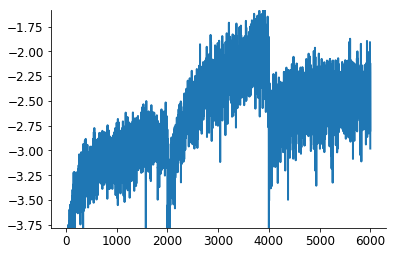

<Figure size 432x288 with 0 Axes>

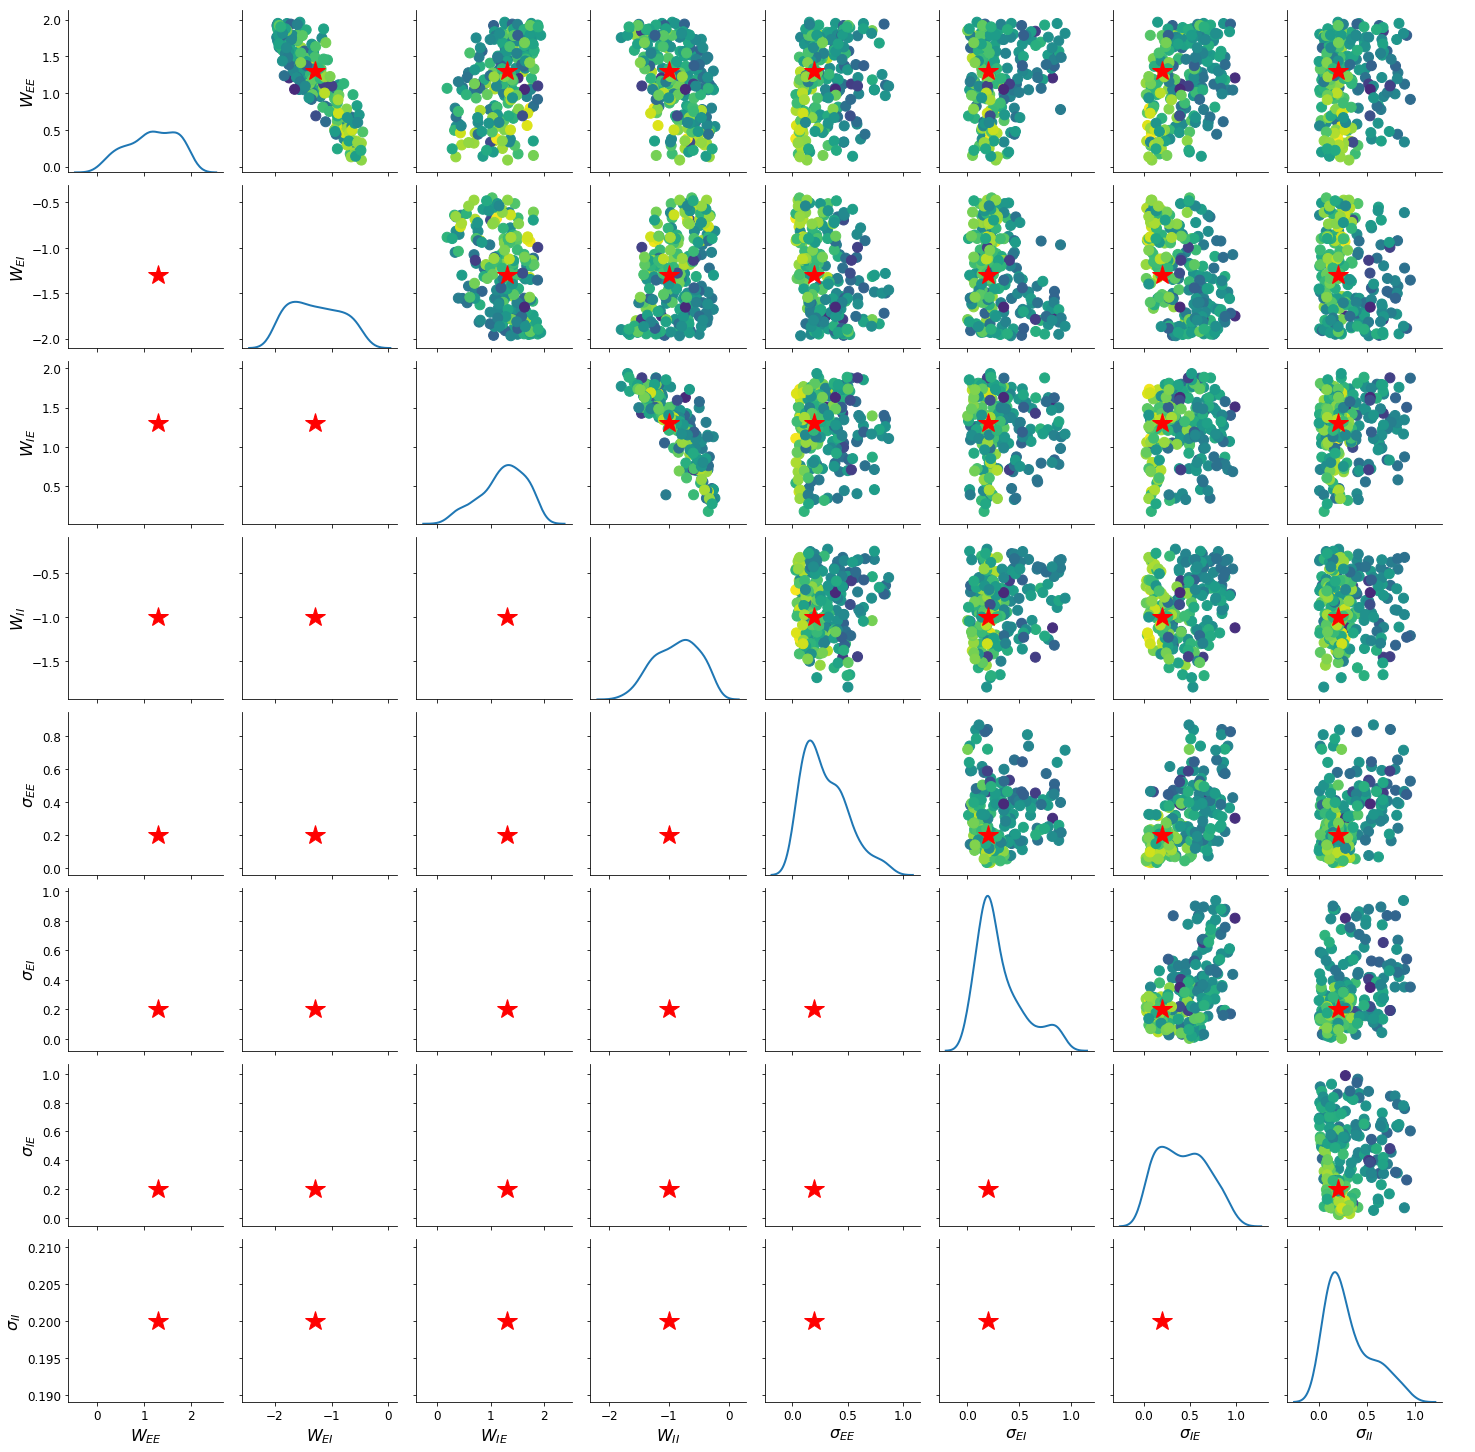

r 4, it 100, loss=2.79E+00, time/it=0.046
r 4, it 200, loss=2.37E+00, time/it=0.046
r 4, it 300, loss=2.14E+00, time/it=0.045
r 4, it 400, loss=2.45E+00, time/it=0.043
r 4, it 500, loss=2.21E+00, time/it=0.048
r 4, it 600, loss=2.32E+00, time/it=0.043
r 4, it 700, loss=2.59E+00, time/it=0.045
r 4, it 800, loss=2.63E+00, time/it=0.043
r 4, it 900, loss=2.53E+00, time/it=0.043
r 4, it 1000, loss=2.62E+00, time/it=0.046
r 4, it 1100, loss=2.13E+00, time/it=0.048
r 4, it 1200, loss=2.83E+00, time/it=0.046
r 4, it 1300, loss=2.62E+00, time/it=0.045
r 4, it 1400, loss=2.36E+00, time/it=0.046
r 4, it 1500, loss=2.41E+00, time/it=0.045
r 4, it 1600, loss=2.56E+00, time/it=0.044
r 4, it 1700, loss=2.26E+00, time/it=0.048
r 4, it 1800, loss=2.19E+00, time/it=0.045
r 4, it 1900, loss=2.38E+00, time/it=0.046
r 4, it 2000, loss=2.36E+00, time/it=0.047


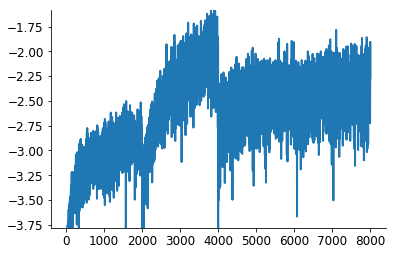

<Figure size 432x288 with 0 Axes>

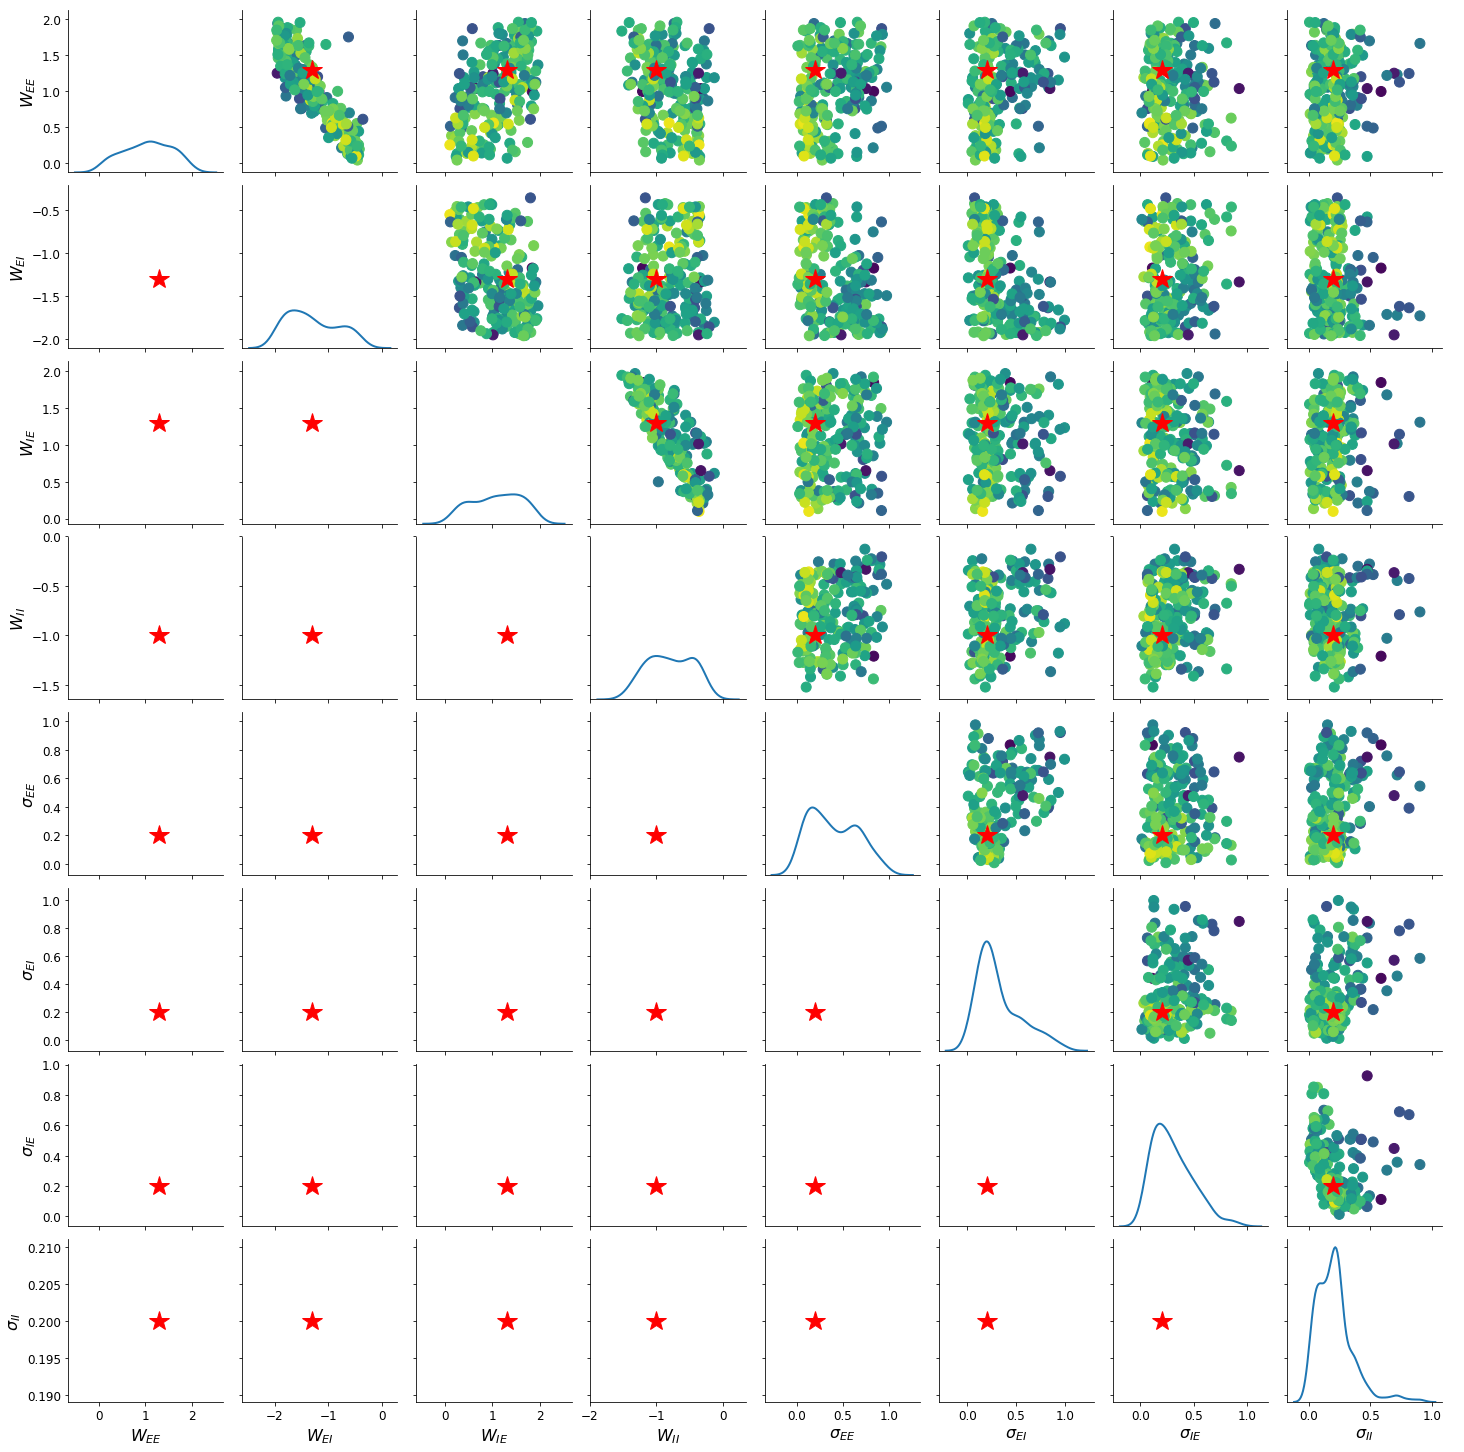

In [4]:
cnf, losses, zs, log_probs, it_time = train_APT(
    cnf, 
    system, 
    x0, 
    M=M, 
    M_atom=M_atom, 
    R=R, 
    num_iters=num_iters, 
    z0=z0[0]
)

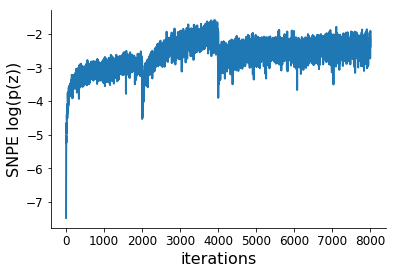

In [5]:
_losses = np.array(losses)
plt.figure()
plt.plot(-_losses)
plt.xlabel('iterations')
plt.ylabel('SNPE log(p(z))')
plt.show()

In [6]:
x0_torch = torch.tensor(x0).float()
z, log_prob= cnf(x0_torch, N=100)

<Figure size 432x288 with 0 Axes>

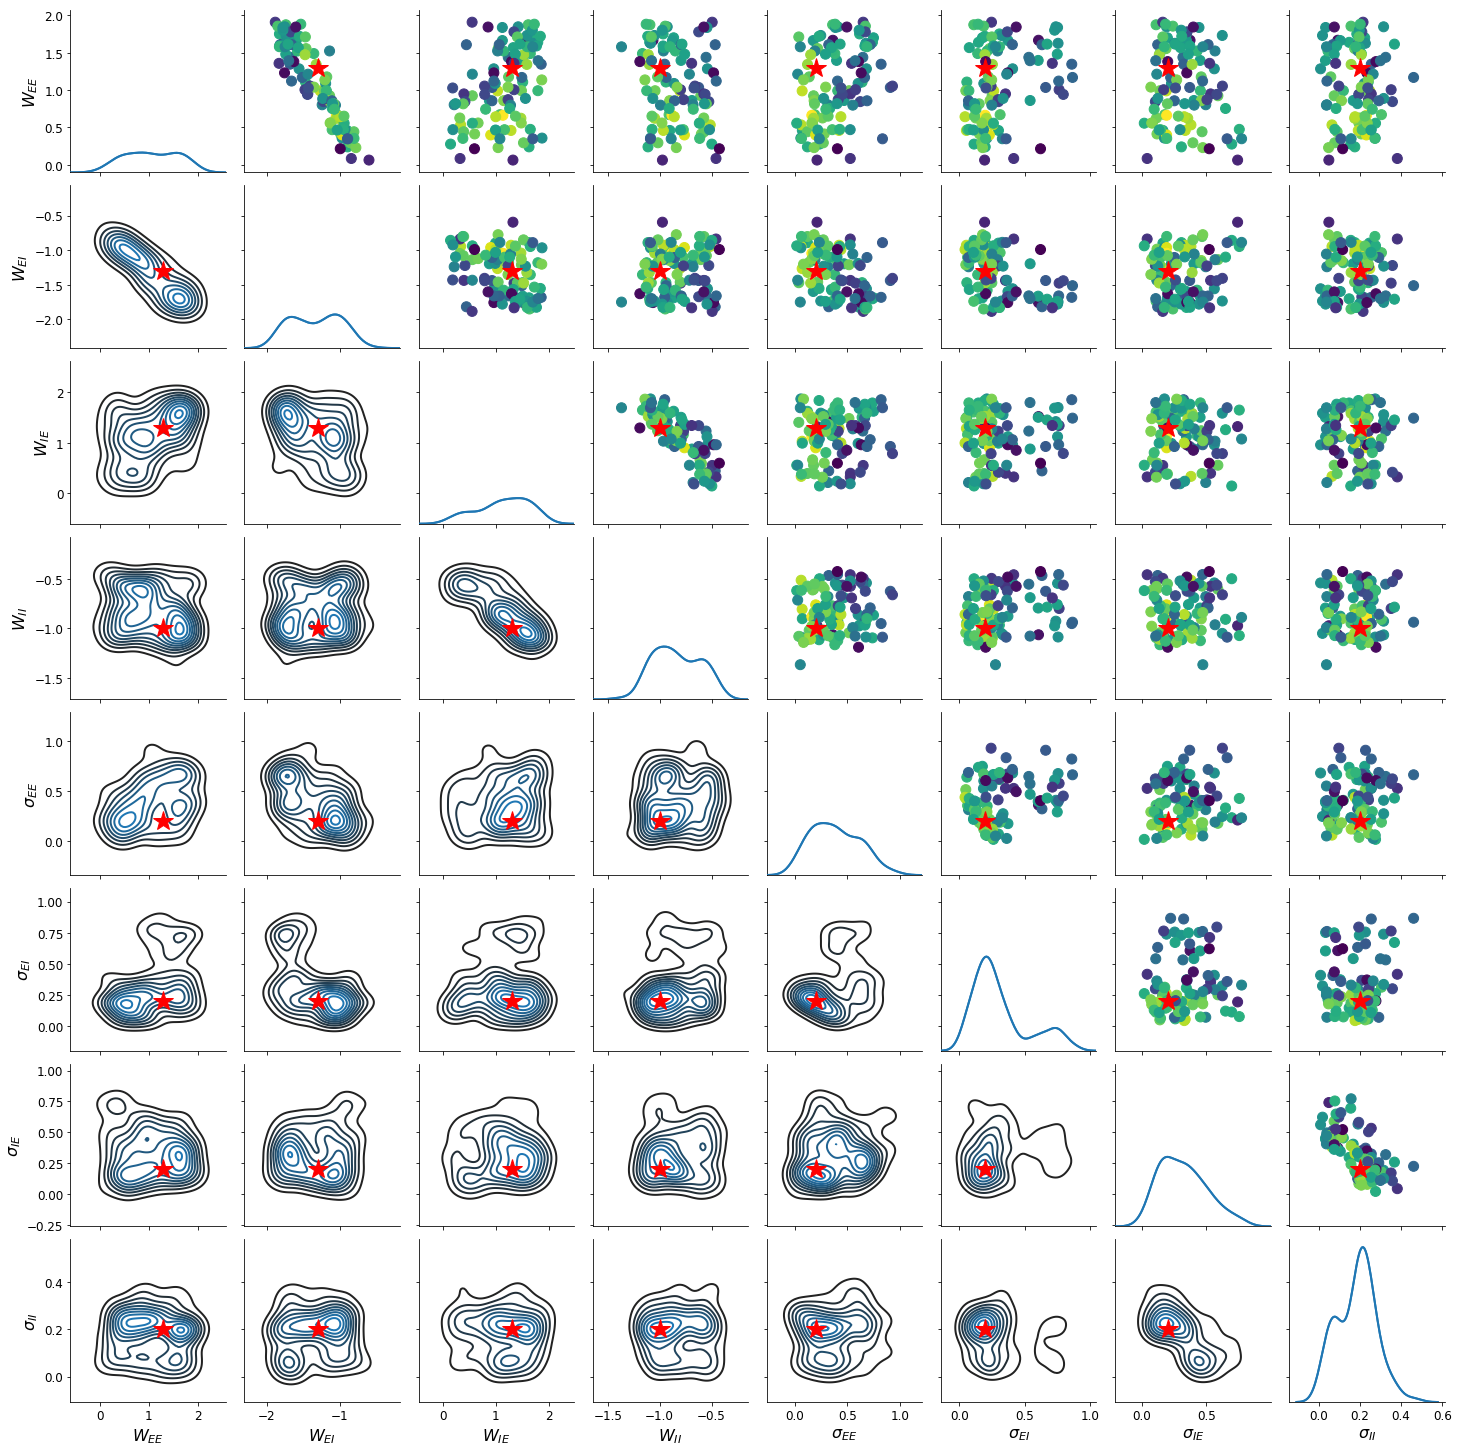

In [7]:
plt.figure()
g = plot_dist(
    z.detach().numpy()[0], 
    log_prob.detach().numpy()[0], 
    kde=True, z0=z0[0], 
    z_labels=system.z_labels
)
